# Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic') #Estilo

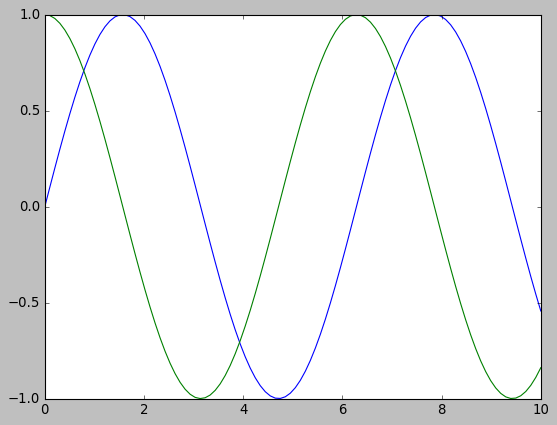

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x)) 
plt.show() #Solo una vez por sesión.

$\texttt{plt.show()}$ inicia un bucle de eventos, busca todos los objetos *figura* activos actualmente y abre una o más ventanas interactivas que muestran su figura o figuras.

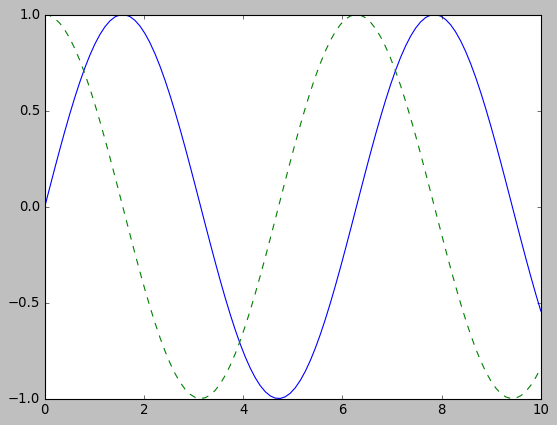

In [5]:
x = np.linspace(0, 10, 100)
fig = plt.figure() #Creamos una ventana
plt.plot(x, np.sin(x),'-')
plt.plot(x, np.cos(x),'--') 
fig.savefig('my_figure.png') #Guardamos en la máquina


In [6]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

## Interfaces

### MATLAB

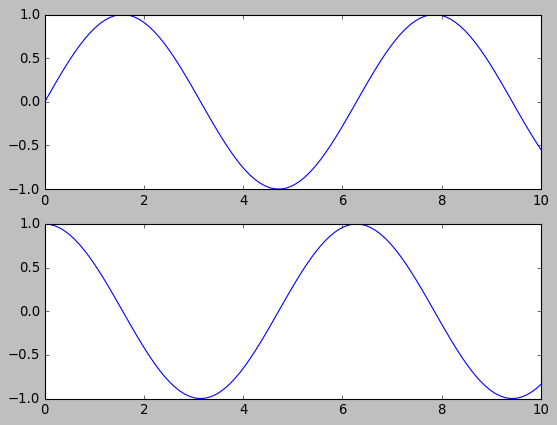

In [9]:
plt.figure() 
# Definimos paneles. Indicamos la dimensión y la posición.
plt.subplot(2, 1, 1) # (filas, columnas, número de panel)
plt.plot(x, np.sin(x))
# Segundo panel
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x)); #Note el ;

### Orientada a objetos

Es un poco más complicada pero permite mayor control sobre las figuras.

array([<Axes: >, <Axes: >], dtype=object)

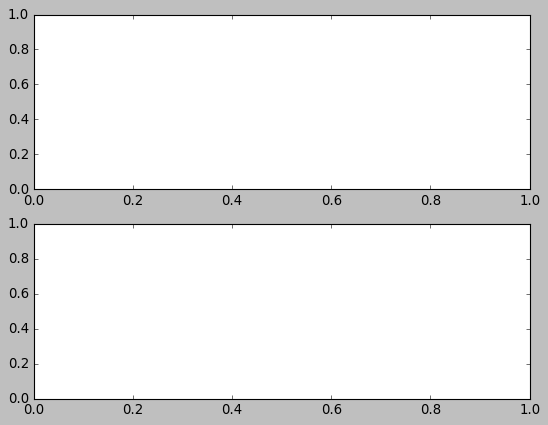

In [10]:
#Creamos un grid
# ax es un array 
fig, ax = plt.subplots(2)
ax

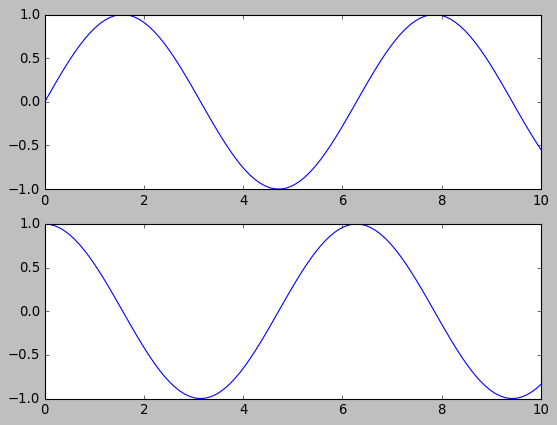

In [12]:
fig, ax = plt.subplots(2)
# Utilizamos plot como método
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));


In [11]:
plt.style.use('seaborn-whitegrid')

C:\Users\josea\AppData\Local\Temp\ipykernel_1020\2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


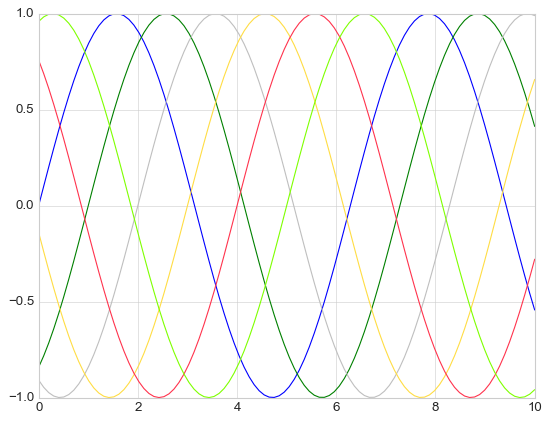

In [16]:
#Especificación del color
plt.plot(x, np.sin(x - 0), color='blue') # Nombre
plt.plot(x, np.sin(x - 1), color='g') # Nombre corto
plt.plot(x, np.sin(x - 2), color='0.75') # Escala de grises
plt.plot(x, np.sin(x - 3), color='#FFDD44') # Código hexadecimal
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # Tupla RGB (normalizada)
plt.plot(x, np.sin(x - 5), color='chartreuse'); # Colores HTML

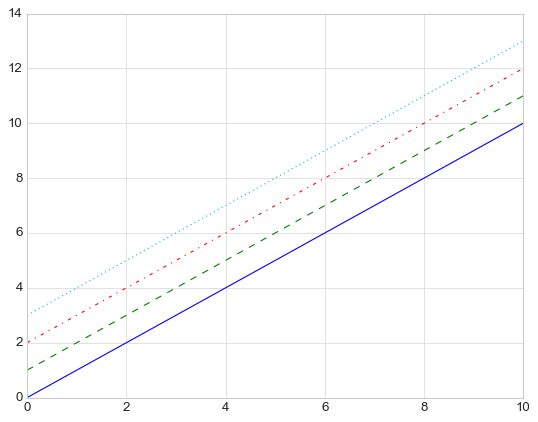

In [12]:
plt.plot(x, x + 0, linestyle='solid') # - 
plt.plot(x, x + 1, linestyle='dashed') # -- 
plt.plot(x, x + 2, linestyle='dashdot') # -.
plt.plot(x, x + 3, linestyle='dotted'); # :

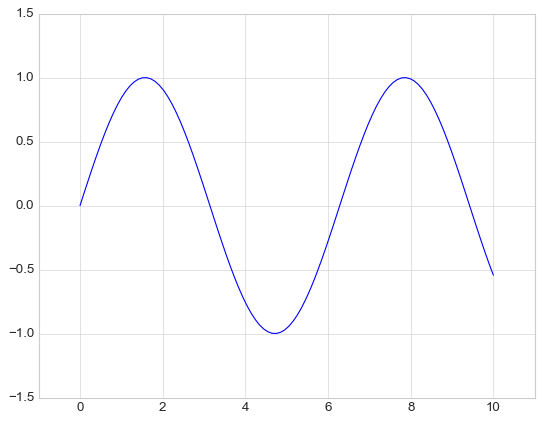

In [13]:
#Ajuste de los límites
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

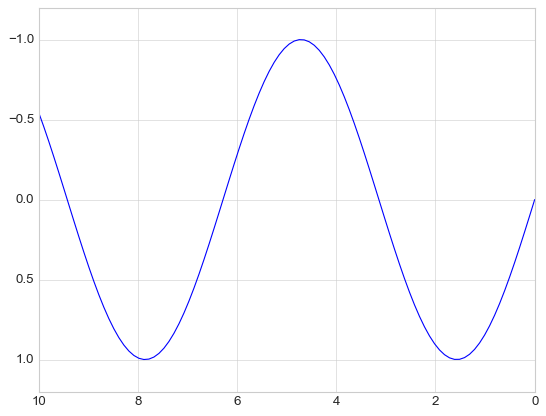

In [19]:
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

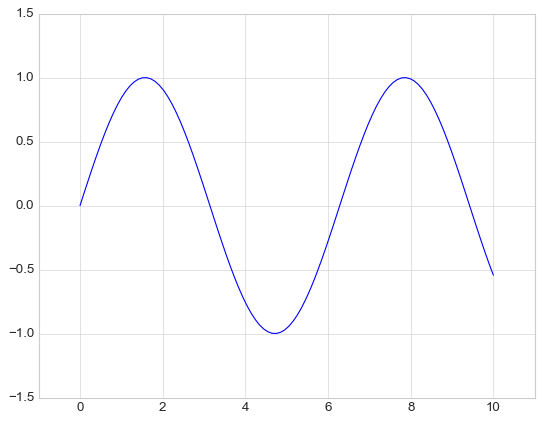

In [14]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

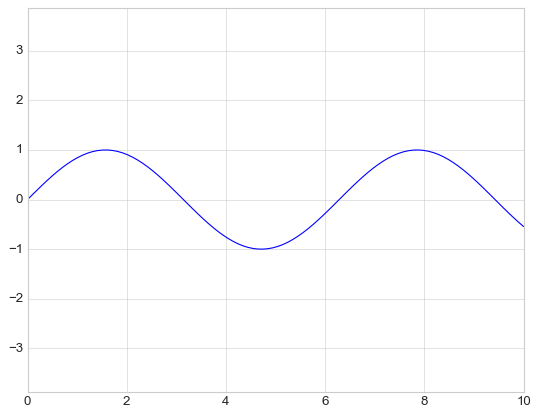

In [15]:
plt.plot(x, np.sin(x))
plt.axis('equal'); #equal

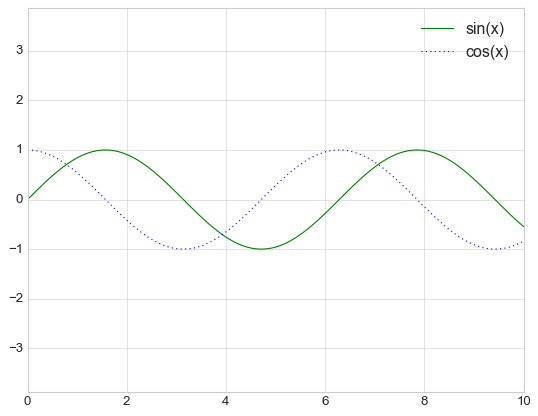

In [16]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();

## Etiquetas

|plt|ax|
|---|---|
|plt.xlabel()|ax.set_xlabel()|
|plt.ylabel()|ax.set_ylabel()|
|plt.xlim()|ax.set_xlim()|
|plt.ylim()|ax.set_ylim()|
|plt.title()|ax.set_title()|

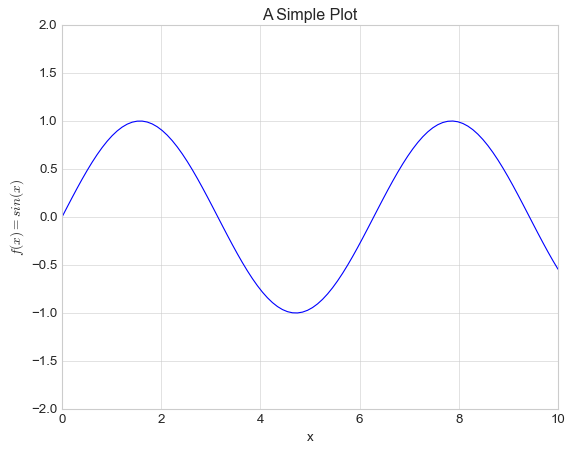

In [18]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), 
       xlabel='x', ylabel= r'$f(x) = sin(x)$',
       title='A Simple Plot');

# Gráficos de dispersión

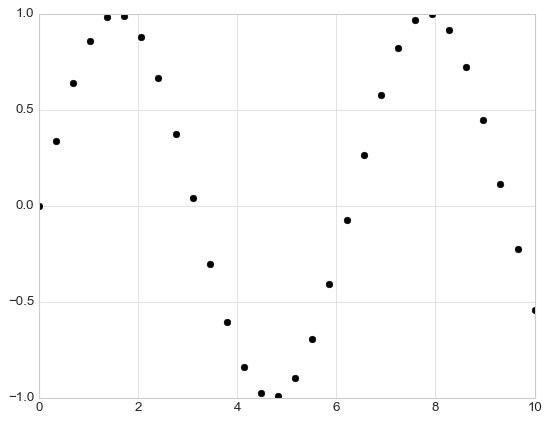

In [23]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

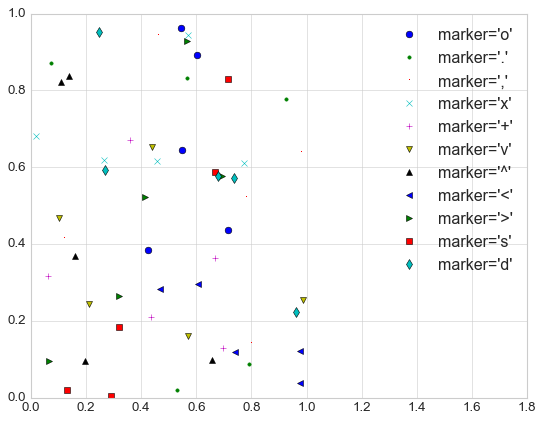

In [24]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

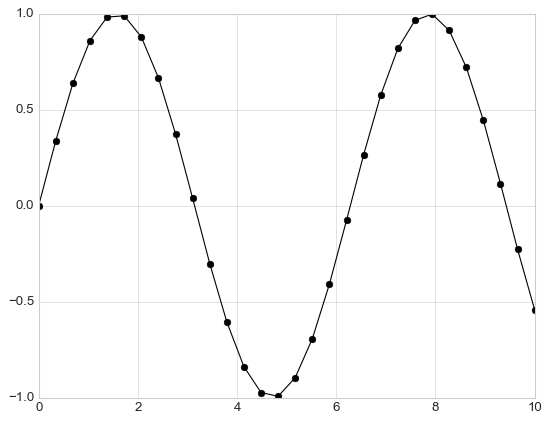

In [25]:
plt.plot(x, y, '-ok');

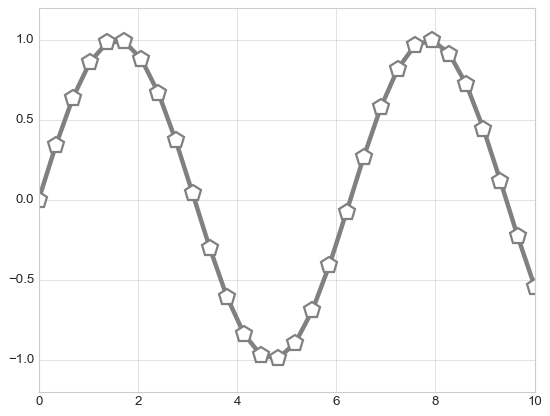

In [26]:
plt.plot(x, y, '-p', 
         color='gray',#Color de la línea
         markersize=15, #Tamaño del marcador
         linewidth=4, #Grosor de la línea
         markerfacecolor='white', #Color de relleno
         markeredgecolor='gray', #Color del contorno
         markeredgewidth=2) #Grosor del contorno del marcador
plt.ylim(-1.2, 1.2);

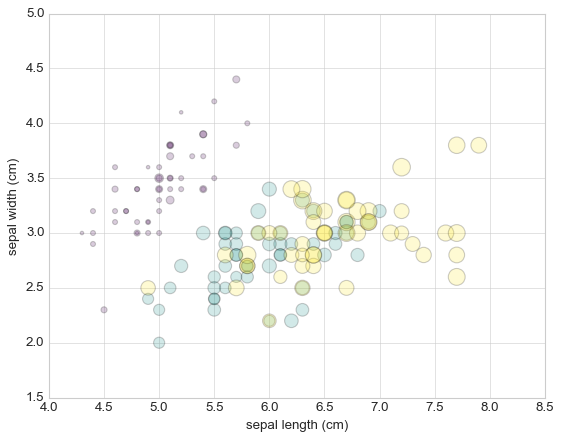

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
#Se pueden personalizar propiedades individuales de cada punto.
plt.scatter(features[0], features[1], 
            alpha=0.2, #Transparencia
            s=100*features[3], # Peso
            c=iris.target, #Clasificación: no lo toma como leyenda
            cmap='viridis') #Mapa de colores
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

plot se diferencia de scatter en que este último dibuja cada punto de forma individual. En bases muy grandes se prefiere plot.

# Barras de error

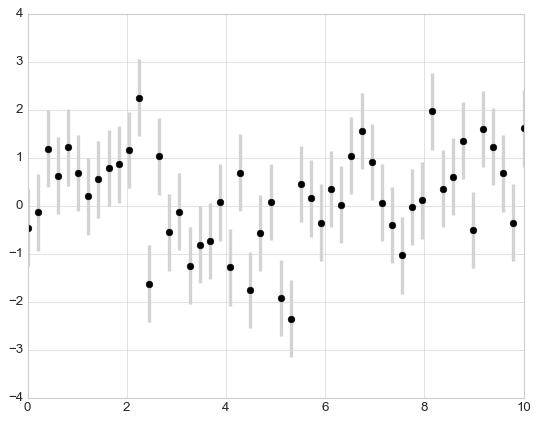

In [33]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, 
             yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

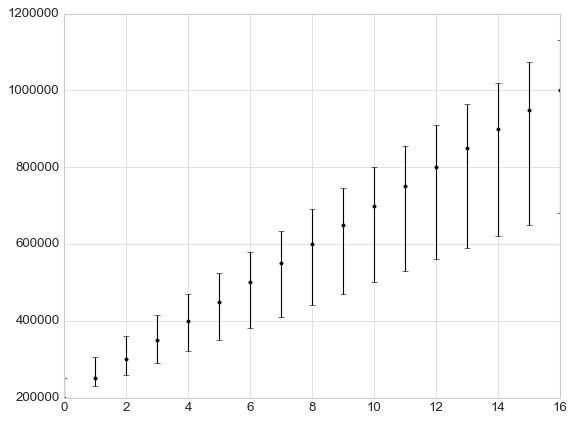

In [34]:
#Salario mínimo, máximo y promedio 
years_estudio = np.arange(17)
salario_promedio = 200000+50000*years_estudio
salario_minimo = 200000+30000*years_estudio
salario_maximo = 250000+55000*years_estudio
errores = [salario_promedio-salario_minimo,-salario_promedio+salario_maximo]
plt.errorbar(years_estudio, salario_promedio, yerr=errores, fmt='.k');

## Histogramas

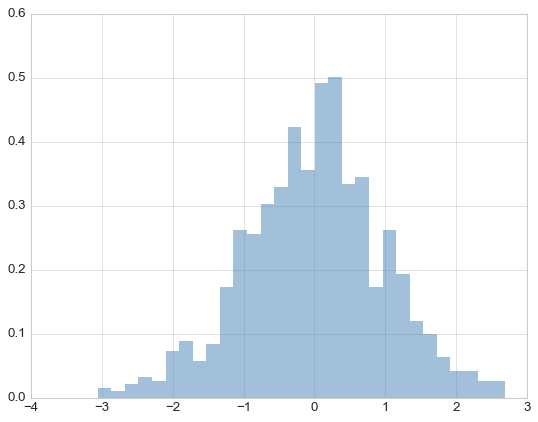

In [41]:
data = np.random.randn(1000)
plt.hist(data, 
         bins=30, 
         alpha=0.5,
         density=True,
         histtype='stepfilled', 
         color='steelblue',
         edgecolor='none'); #Quitamos el contorno

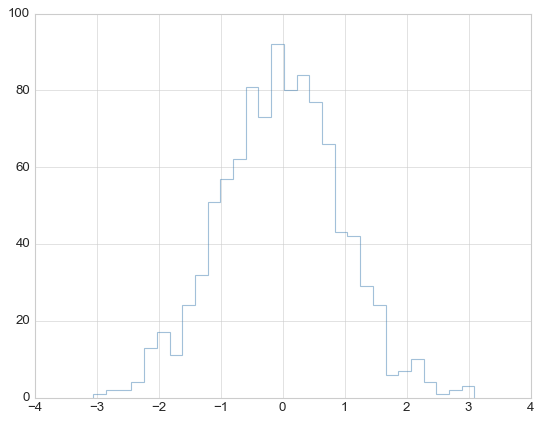

In [43]:
data = np.random.randn(1000)
plt.hist(data, bins=30, alpha=0.5,
         histtype='step', 
         color='steelblue'); 

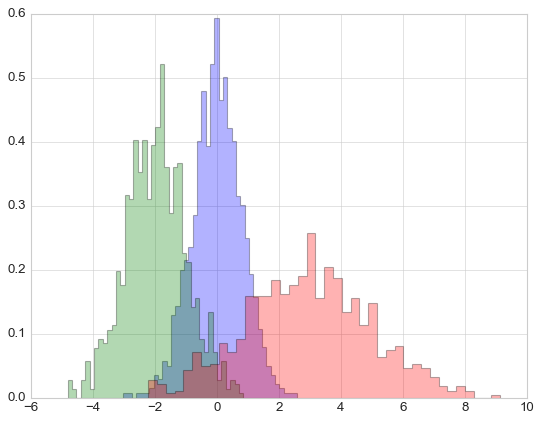

In [44]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, density = True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [47]:
counts, bin_edges = np.histogram(data, bins=30)
print(counts)
print(bin_edges) #Solo para los resultados

[ 1  2  2  4 13 17 11 24 32 51 57 62 81 73 92 80 84 77 66 43 42 29 24  6
  7 10  4  1  2  3]
[-3.0524324  -2.84752213 -2.64261186 -2.43770159 -2.23279133 -2.02788106
 -1.82297079 -1.61806052 -1.41315026 -1.20823999 -1.00332972 -0.79841945
 -0.59350919 -0.38859892 -0.18368865  0.02122162  0.22613188  0.43104215
  0.63595242  0.84086269  1.04577295  1.25068322  1.45559349  1.66050376
  1.86541403  2.07032429  2.27523456  2.48014483  2.6850551   2.88996536
  3.09487563]


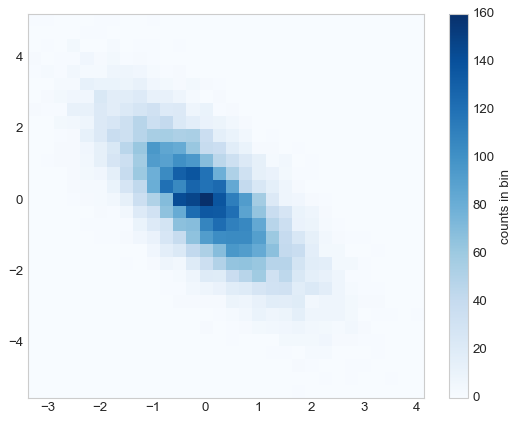

In [50]:
mean = [0, 0]
cov = [[1, -1], [-1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

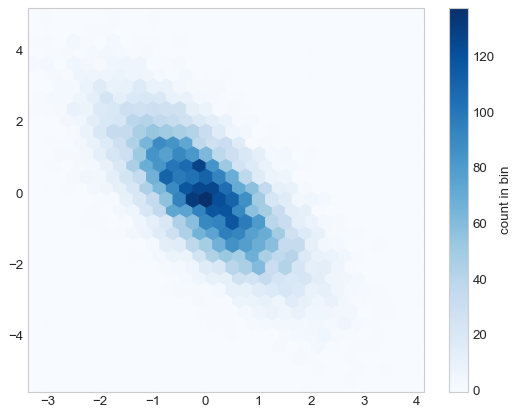

In [51]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label = 'count in bin')

## Personalización
### Leyendas

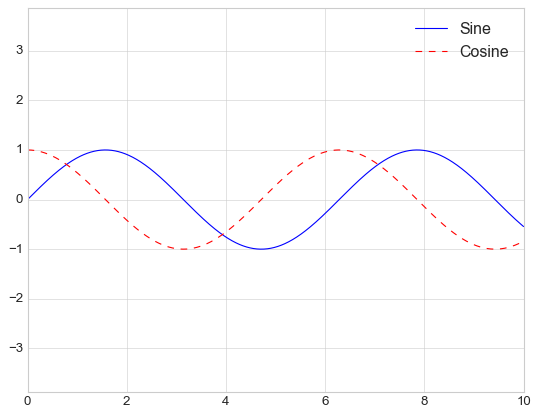

In [52]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

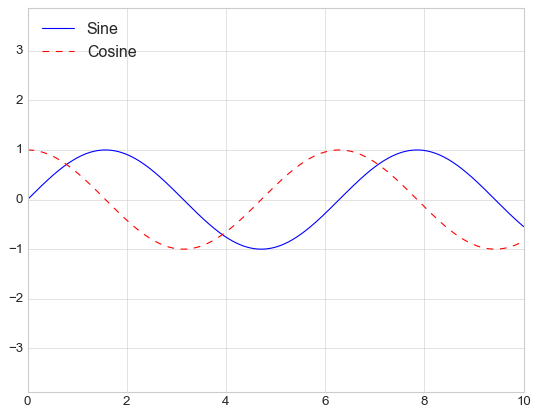

In [54]:
ax.legend(loc='upper left',#Localización
           frameon=False) #Cajita
fig

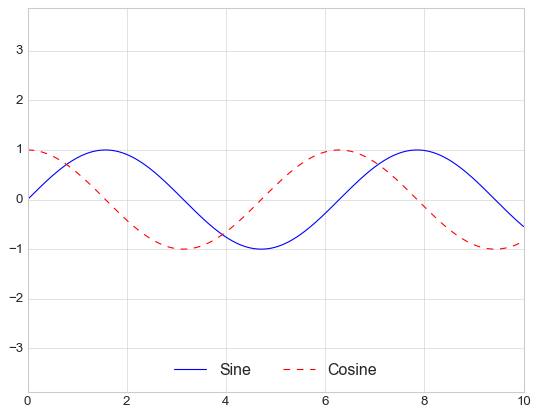

In [58]:
ax.legend(frameon=False, loc='lower center', ncol=2) 
#Elegimos la cantidad de columnas y se acomoda a ellas
fig

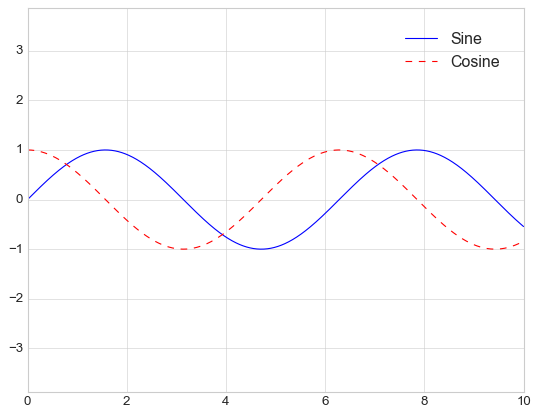

In [55]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

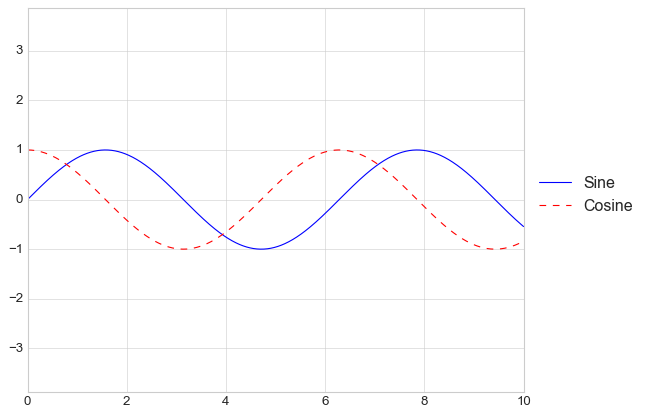

In [63]:
#ax.legend(loc='best', bbox_to_anchor=(0.8, 0.15, 0.5, 0.5)) #(x,y,width,heigth)
ax.legend(loc='best', bbox_to_anchor=(0.75,0.10, 0.5, 0.5)) 
fig

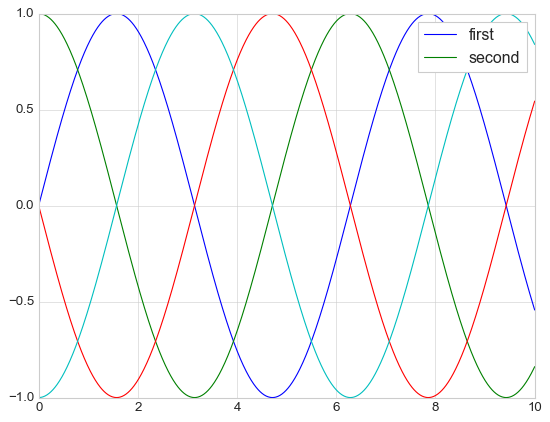

In [67]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)) #Interpretar qué hace esto
plt.plot(x, y[:, 0], label='first') 
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:]) #No le ponemos label a un plot, no va a aparecer en la leyenda.
plt.legend(framealpha=1, frameon=True);

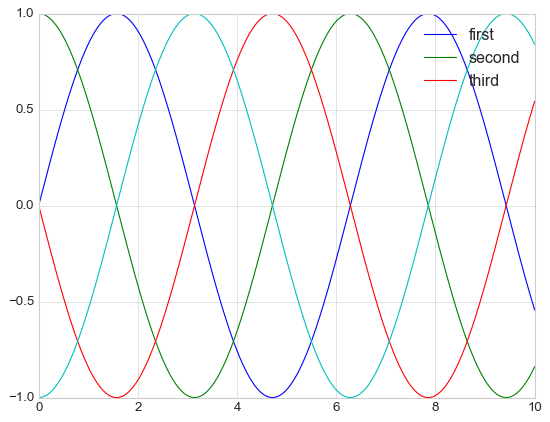

In [71]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)) #Interpretar qué hace esto
lines = plt.plot(x, y)
# Obtengo las líneas
plt.legend(lines[:3], ['first', 'second','third']); #Indico a cuáles asigno leyenda

In [69]:
lines

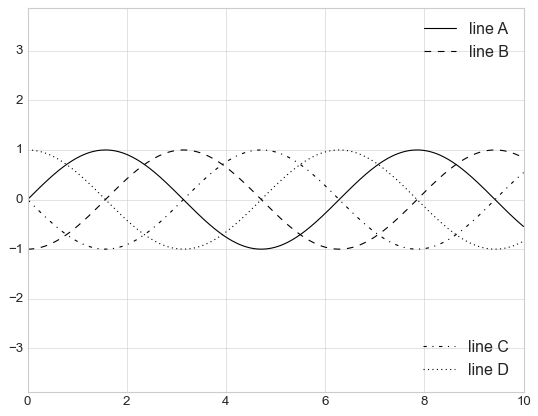

In [88]:
#Crear varias leyendas
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

In [1]:
## Múltiples gráficos

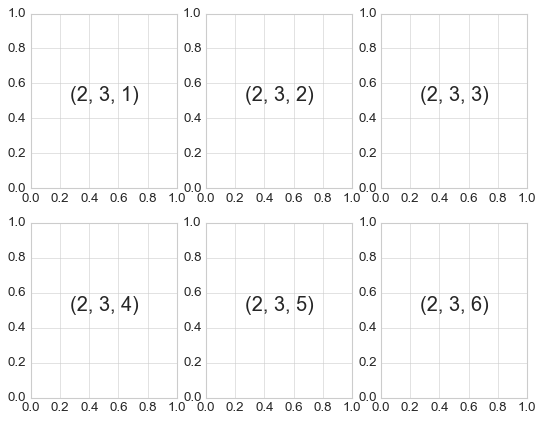

In [89]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

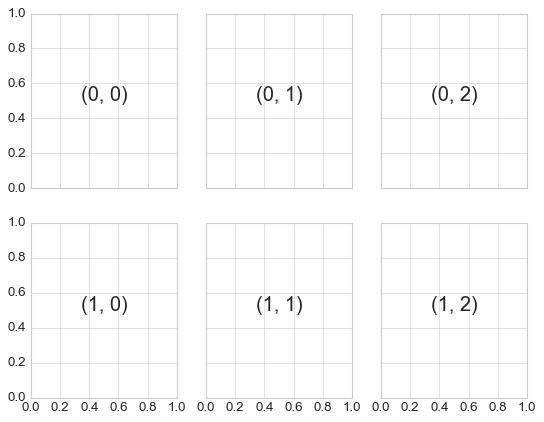

In [90]:
#Tiene una s al final
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') #Comparten fila y columna
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),fontsize=18, ha='center')

In [91]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
#Dos filas y tres columnas. Distribuimos el espacio.

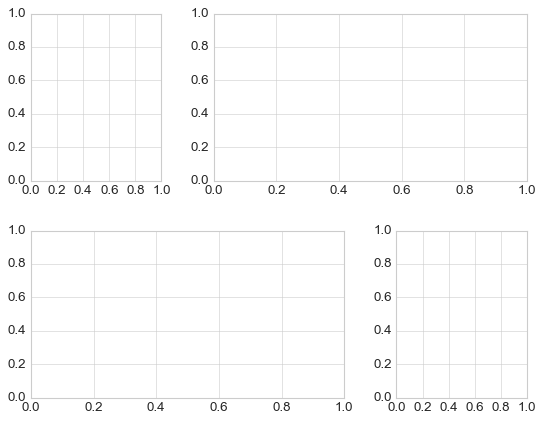

In [92]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

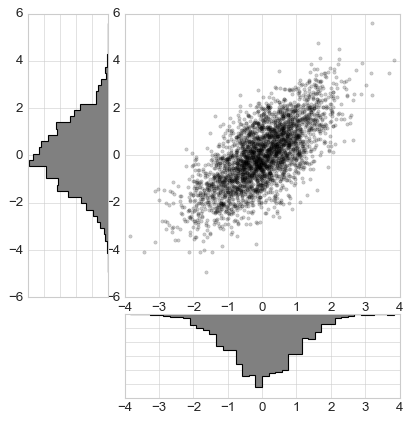

In [93]:
# Data normal multivariada
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Configuración de los ejes
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:]) #Interpretar slicing
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

#Llenamos los gráficos
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [ ]:
# Texto y anotaciones

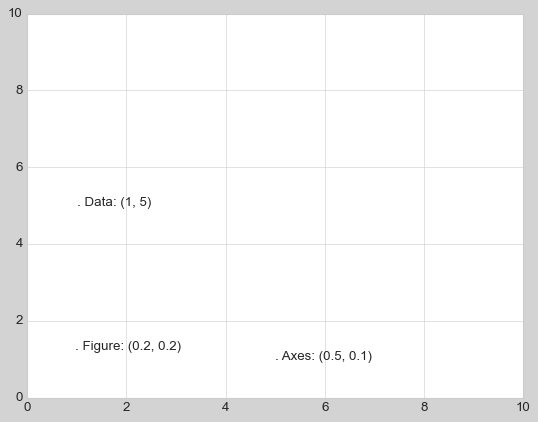

In [94]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])
#Sobre cúales coordenadas
#De los datos
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
#De los ejes
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
#De la figura
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

In [ ]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

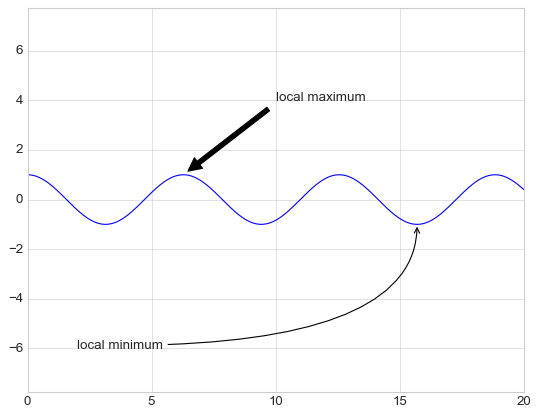

In [95]:
fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

In [111]:
import pandas as pd
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.index = [pd.to_datetime(f'2012-{month}-{day}',format="%Y-%m-%d") for (month, day) in births_by_date.index]

In [112]:
births_by_date

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625
...,...
2012-12-27,4850.150
2012-12-28,5044.200
2012-12-29,5120.150
2012-12-30,5172.350


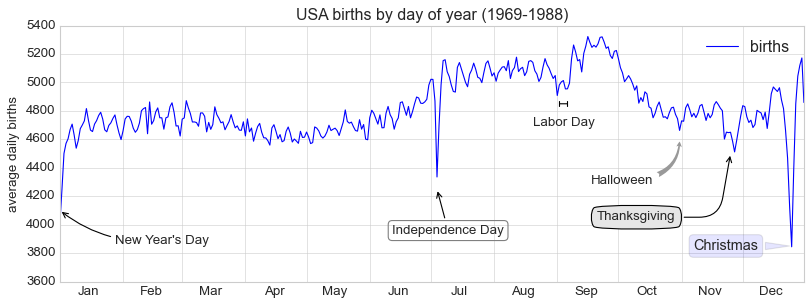

In [115]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot

ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
           xytext=(-120, -60), textcoords='offset points',
           bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
           arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
            size=13, ha='right', va="center",
            bbox=dict(boxstyle="round", alpha=0.1),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);

Ticks

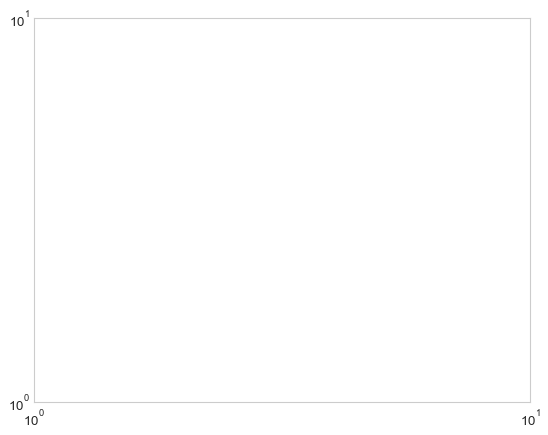

In [116]:
ax = plt.axes(xscale='log', yscale='log')

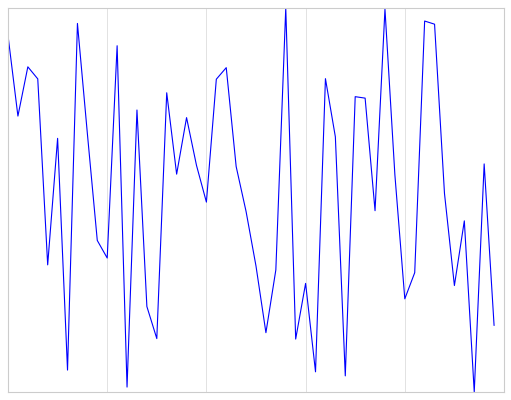

In [120]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

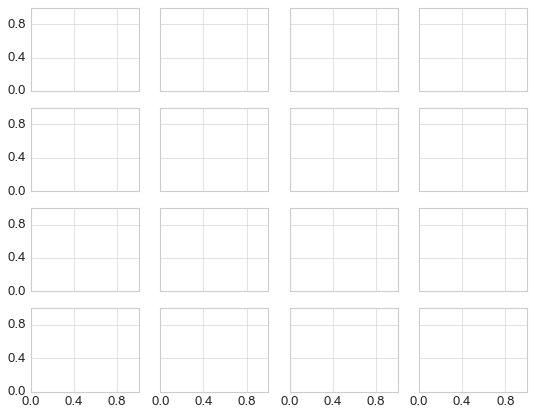

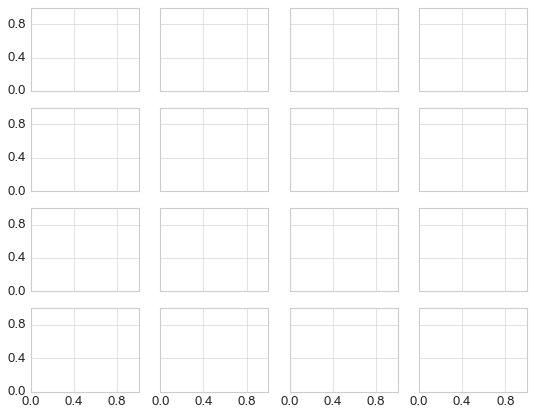

In [122]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

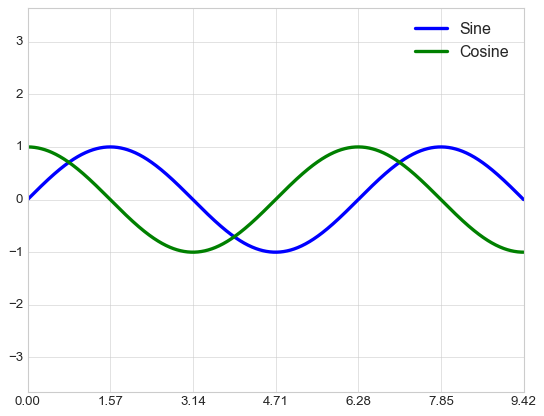

In [125]:

fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

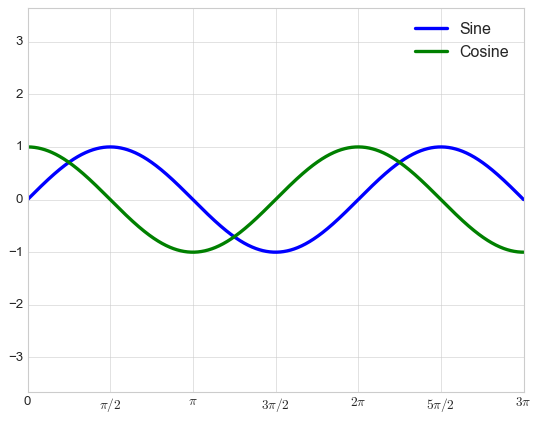

In [126]:
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

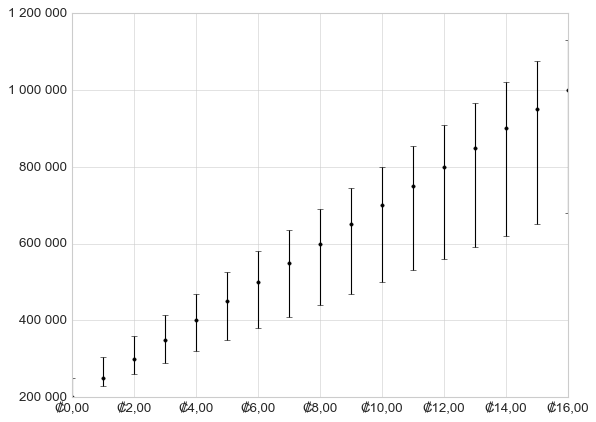

In [157]:
import locale
locale.setlocale(locale.LC_NUMERIC, "es_ES")
locale._override_localeconv["thousands_sep"] = " "

plt.rcParams["axes.formatter.use_locale"] = "True"

ax = plt.axes()
plt.errorbar(years_estudio, salario_promedio, yerr=errores, fmt='.k');
ax.xaxis.set_major_formatter(lambda x, p: locale.currency(x))

In [ ]:
#https://docs.python.org/es/3.10/library/locale.html

In [158]:
IPython_default = plt.rcParams.copy()

from matplotlib import cycler
colors = cycler('color',['#EE6666', '#3388BB', '#9988DD',
                         '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

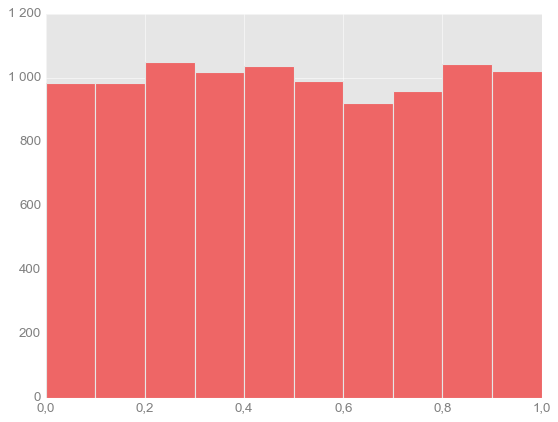

In [163]:
plt.hist(np.random.rand(10000));

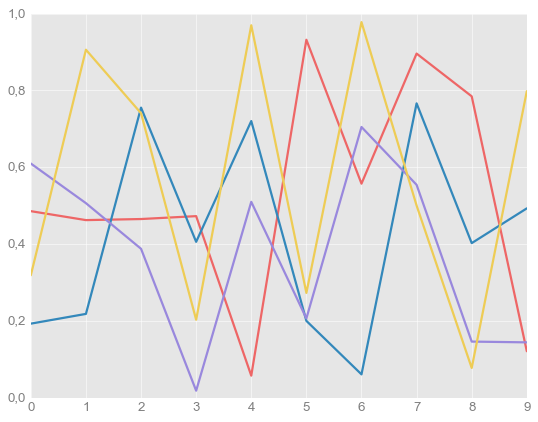

In [164]:
for i in range(4):
    plt.plot(np.random.rand(10))

In [165]:
plt.rcParams.update(IPython_default); #Reseteamos
plt.rcParams.update(mpl.rcParamsDefault)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [172]:
def hist_and_lines(title = ''):
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')
    fig.suptitle(title, fontsize=20)

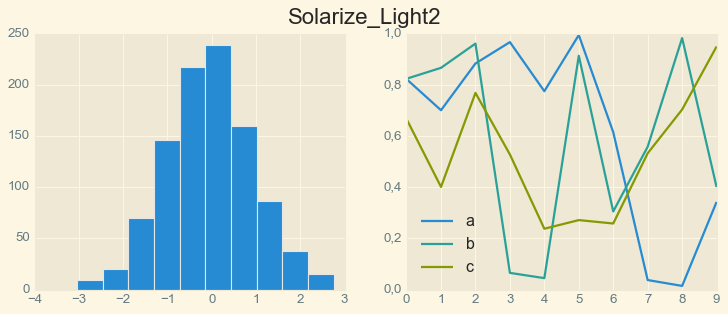

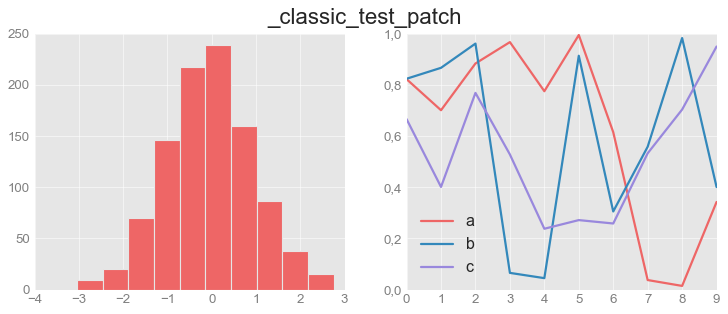

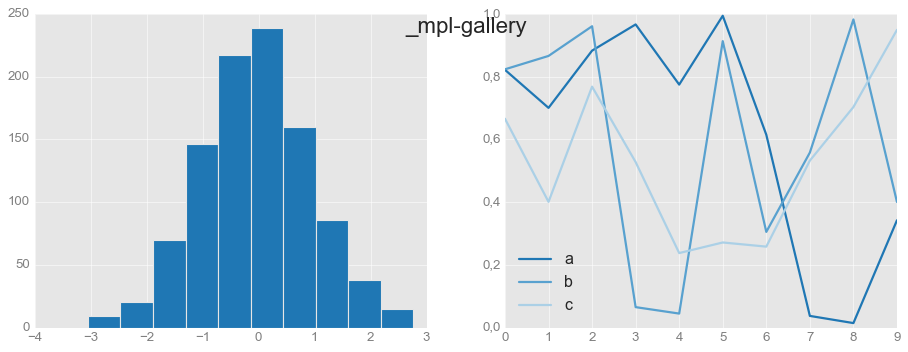

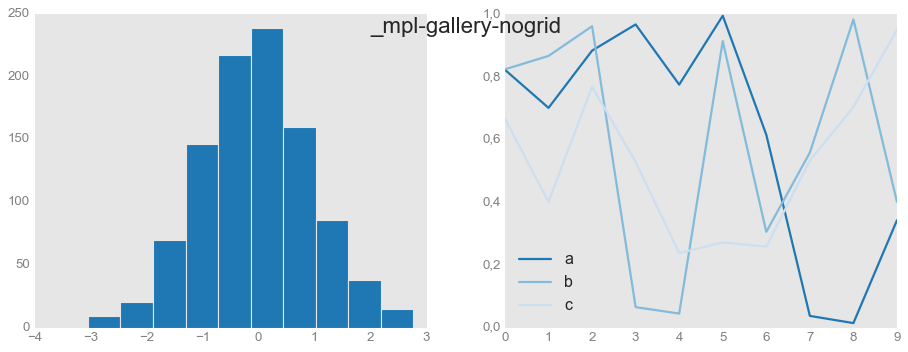

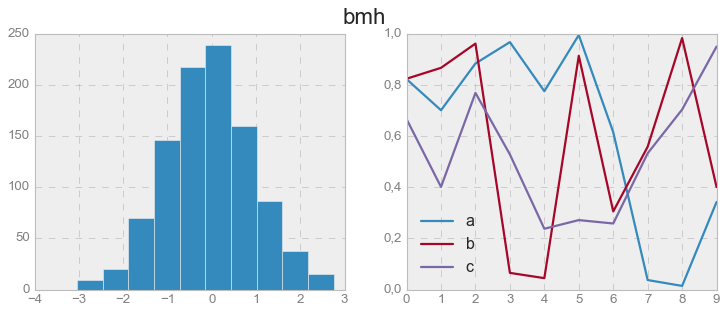

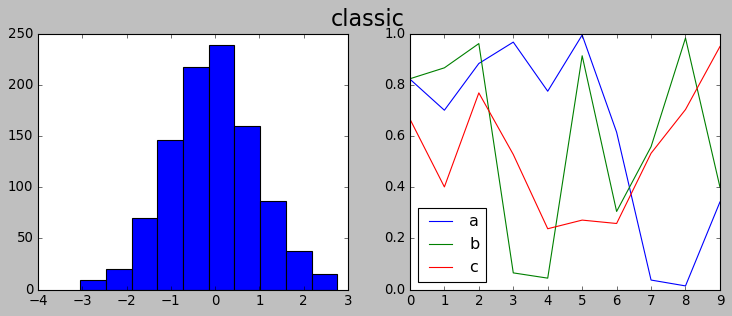

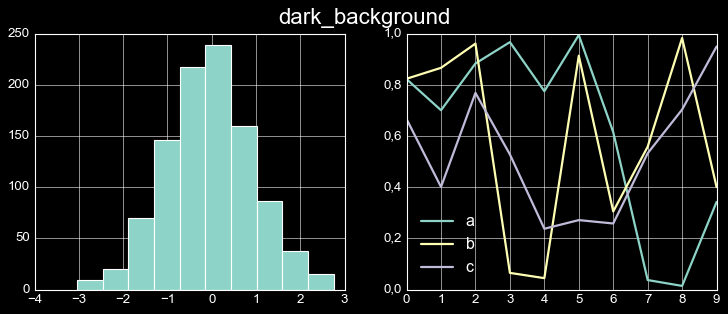

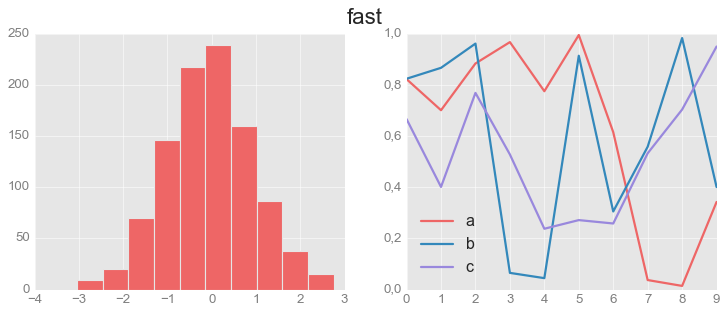

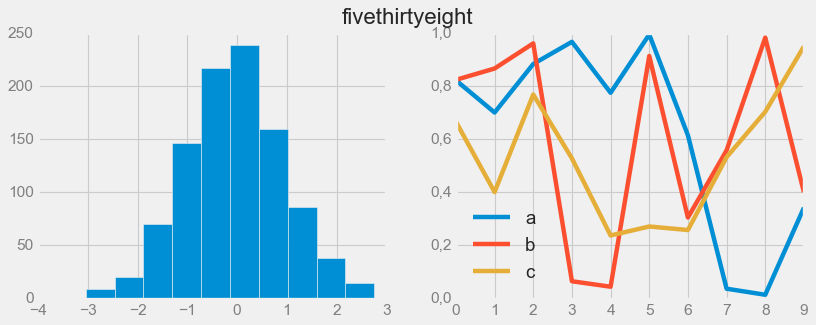

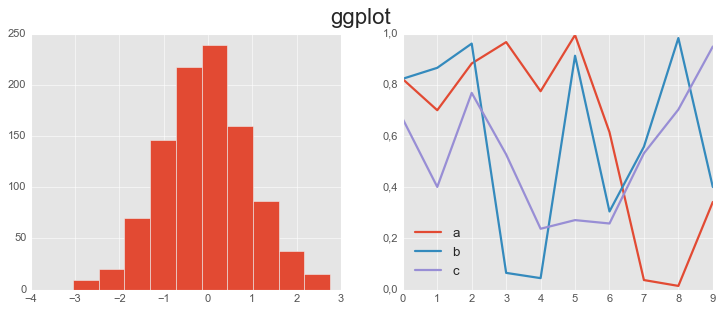

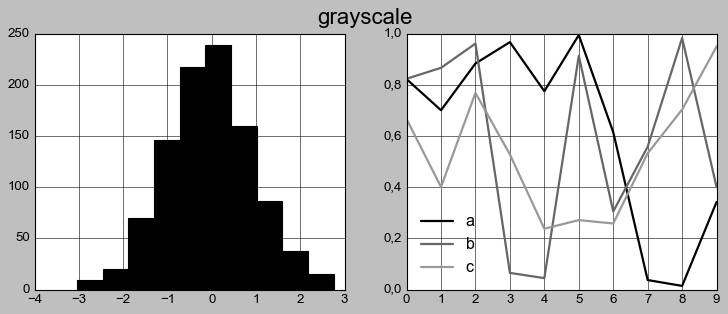

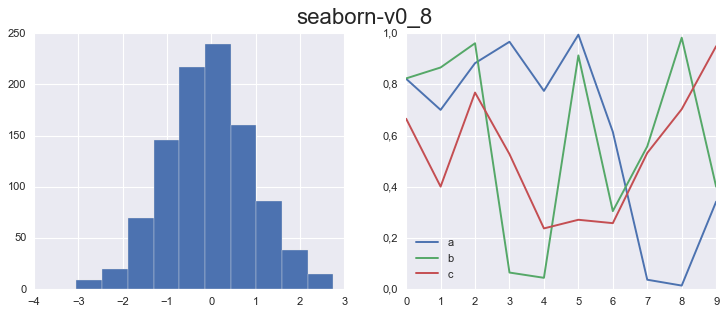

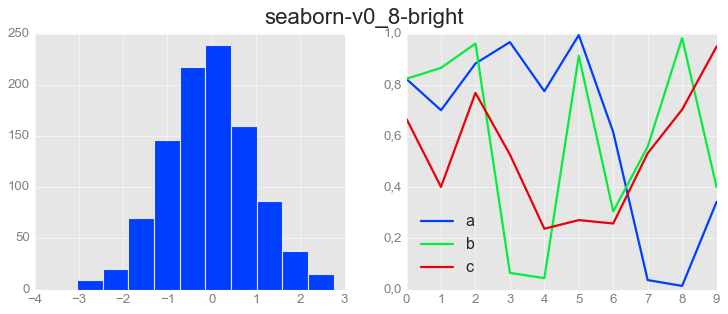

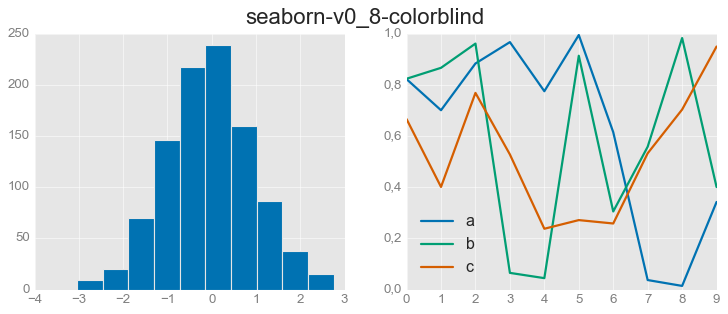

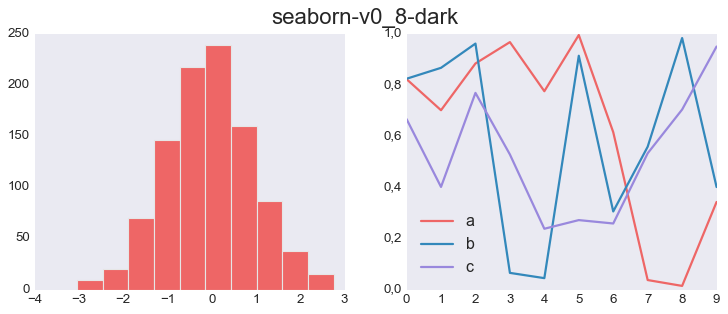

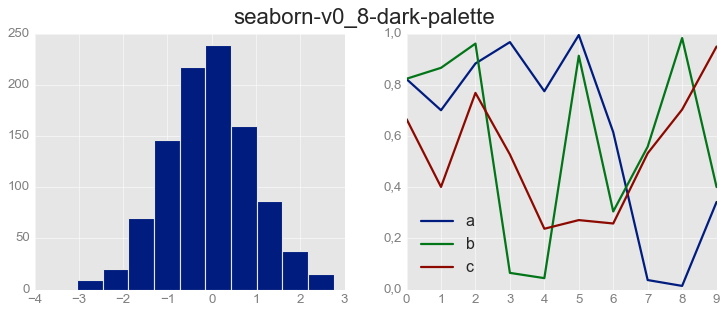

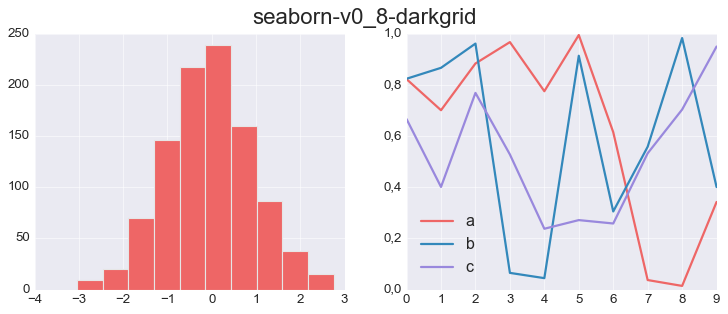

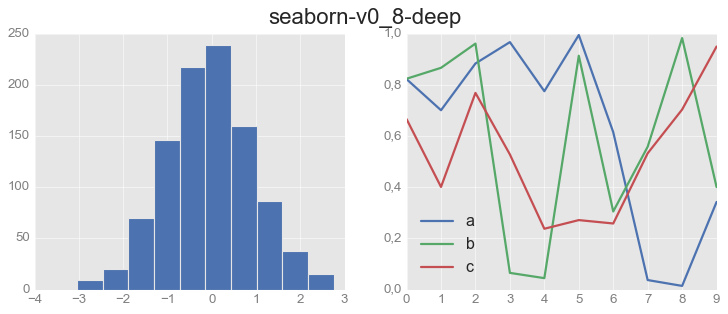

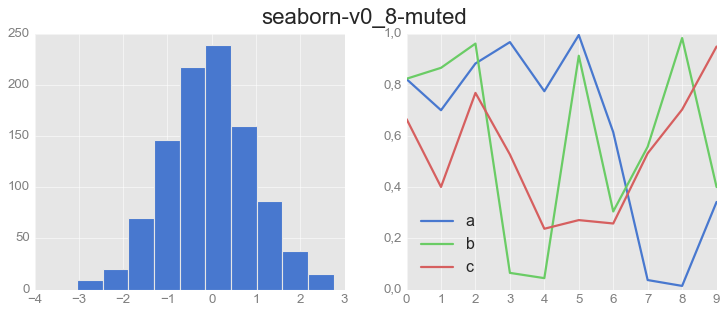

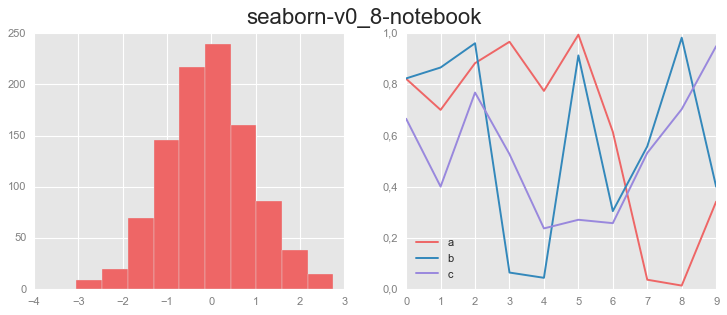

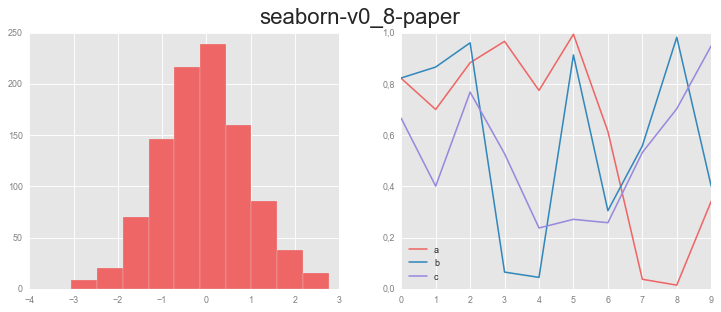

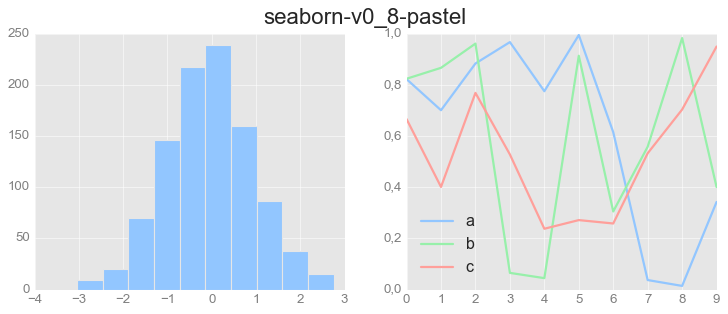

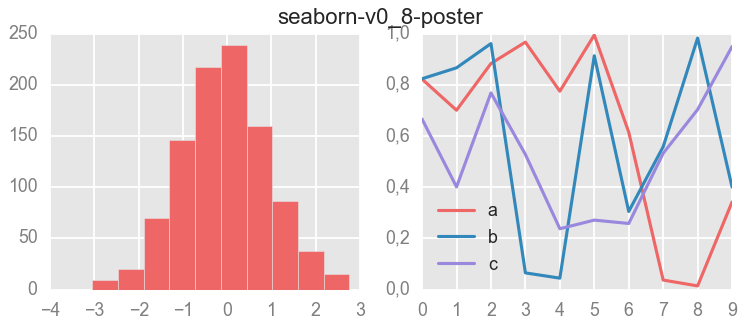

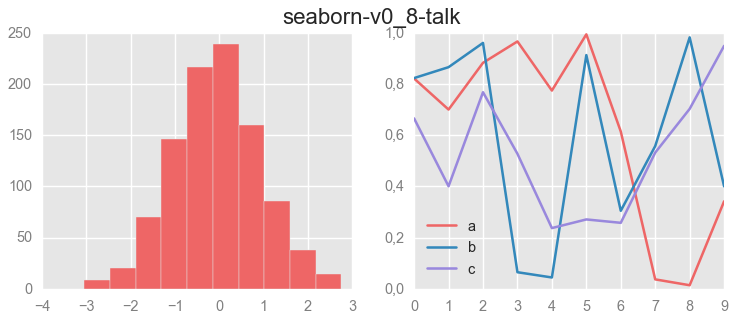

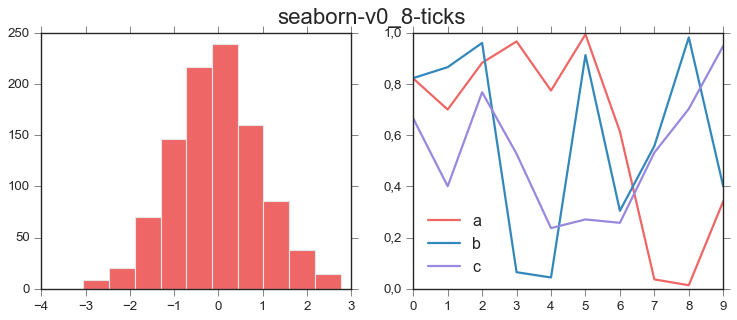

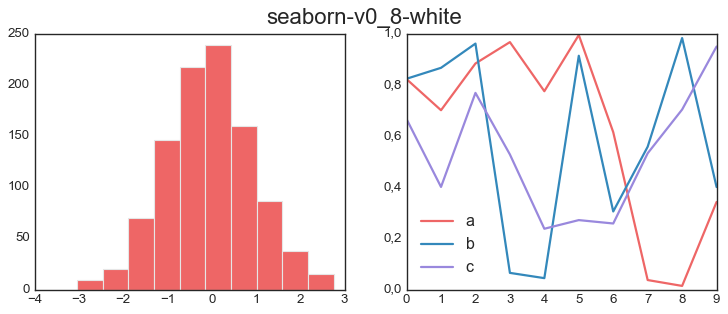

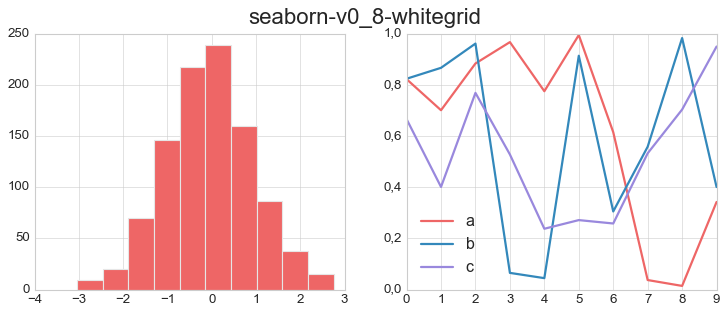

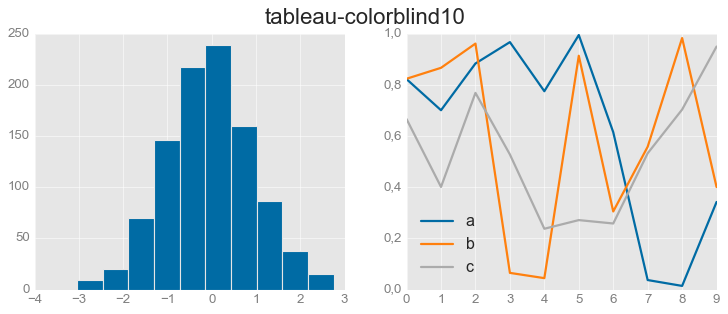

In [175]:
estilos = plt.style.available
for estilo in estilos:
    with plt.style.context(estilo):
        hist_and_lines(estilo)